# Customer Churn Analysis, Machine Learning and ANN Deep Learning Models.

This data is sourced from https://www.kaggle.com/datasets/blastchar/telco-customer-churn.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.xls')

In [ ]:
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# As we can see, there are 7032 customers and 20 variables, each represented by rows and columns respectively.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#From all the above columns, the customerID column will be dropped, as it will not aid in the customer churn analysis
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# From the information, we can see that the TotalCharges column is not a float. Let's convert it into a float.
df.TotalCharges = df.TotalCharges.astype('float')

ValueError: ignored

In [ ]:
#There is an error in the data. From the above error message, we have discovered that the TotalCharges column has some non-numerical data.

In [ ]:
df.loc[df.TotalCharges == ' ']
#From the below df we do not only see that there are eleven rows with no TotalCharges, but also rows with tenure = 0!

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#Let's drop the rows with no Total Charges
df = df[~df['TotalCharges'].str.contains(" ")==True]

In [ ]:
df.loc[df.TotalCharges == ' ']
#As we can see, the rows with blank space values have been removed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
#Let's try transforming the column values into a float again
df.TotalCharges = df.TotalCharges.astype('float')

In [ ]:
#Checking to see if all the data types are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
#Let's now check how many more tenure columns have the value 0.
df[df['tenure'] == 0]
#Looks like all the rows which got removed were the only rows with tenure = 0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Exploratory Data Analysis

In [ ]:
#Let's do some Exploratory Data Analysis

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


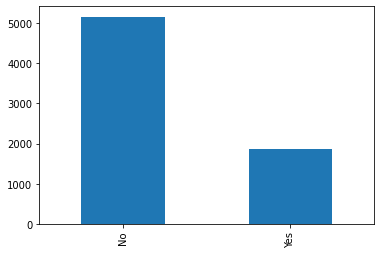

In [ ]:
df['Churn'].value_counts().plot(kind='bar')
print(df['Churn'].value_counts(normalize=True)*100)
#73% of the customers are staying, while 26% have churned

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="PaymentMethod", barmode="relative", title="Customer contract distribution based on payment type")
fig.update_layout(width=500, height=500, bargap=0.5)
fig.show()
#It can be seen that most churners are paying by electronic check

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="PhoneService", barmode="stack", title="Customer contract distribution based on service")
fig.update_layout(width=500, height=500, bargap=0.5)
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="Contract", barmode="relative", title="Customer contract distribution based on contract length")
fig.update_layout(width=500, height=500, bargap=0.5)
fig.show()
#It can be seen that a wide majority of churners are on month-to-month plans

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="SeniorCitizen", barmode="relative", title="Customer contract distribution based on seniority")
fig.update_layout(width=500, height=500, bargap=0.5)
fig.show()
#It can be seen that a wide majority of churners are senior citizens

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="gender", barmode="group", title="Customer contract distribution based on gender")
fig.update_layout(width=500, height=500, bargap=0.5)
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="Customer contract distribution based on dependents")
fig.update_layout(width=500, height=500, bargap=0.5)
fig.show()
#People without dependents are more likely to churn.

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="Customer contract distribution based on partners")
fig.update_layout(width=500, height=500, bargap=0.5)
fig.show()
#People without partners are more likely to churn.

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="TechSupport", barmode="group", title="Customer contract distribution")
fig.update_layout(width=500, height=500, bargap=0.5)
fig.show()
#People without dependents are more likely to churn.

In [ ]:
#Now, Let's take a look at the contract pricing

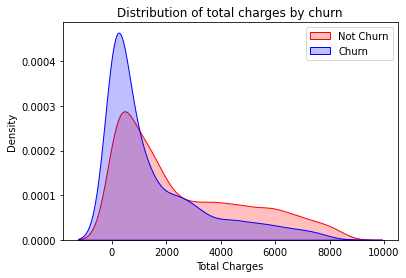

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');
#It is observable that most churners pay less, and a few pay more than 4000, whereas for non-churners, 
# the data is still skewed, but less so.

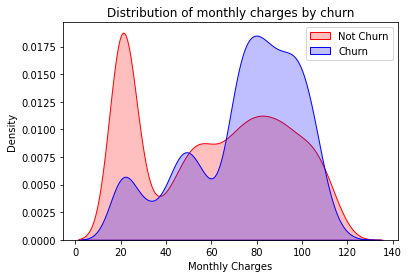

In [ ]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');
#One reason that people might be churning is the gradual increase in monthly charges.

In [ ]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


# Data Preprocessing for Machine Learning

In [ ]:
df["gender"]= df["gender"].map({"Female": 0, "Male": 1})
df["Partner"]= df["Partner"].map({"No": 0, "Yes": 1})
df["Dependents"]= df["Dependents"].map({"No": 0, "Yes": 1})
df["PhoneService"]= df["PhoneService"].map({"No": 0, "Yes": 1})
df["MultipleLines"]= df["MultipleLines"].map({"No": 0, "Yes": 1, "No phone service":2})
df["InternetService"]= df["InternetService"].map({"No": 0, "DSL": 1, "Fiber optic":2})
df["OnlineSecurity"]= df["OnlineSecurity"].map({"No": 0, "Yes": 1, "No internet service":2})
df["OnlineBackup"]= df["OnlineBackup"].map({"No": 0, "Yes": 1, "No internet service":2})
df["DeviceProtection"]= df["DeviceProtection"].map({"No": 0, "Yes": 1, "No internet service":2})
df["TechSupport"]= df["TechSupport"].map({"No": 0, "Yes": 1, "No internet service":2})
df["StreamingTV"]= df["StreamingTV"].map({"No": 0, "Yes": 1, "No internet service":2})
df["StreamingMovies"]= df["StreamingMovies"].map({"No": 0, "Yes": 1, "No internet service":2})
df["Contract"]= df["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year":2})
df["PaperlessBilling"]= df["PaperlessBilling"].map({"No": 0, "Yes": 1})
df["PaymentMethod"]= df["PaymentMethod"].map({"Electronic check": 0, "Mailed check": 1,"Bank transfer (automatic)": 2, "Credit card (automatic)": 3})
df["Churn"]= df["Churn"].map({"No": 0, "Yes": 1})
df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, ConfusionMatrixDisplay

In [ ]:
def evalmetrics(ytest, ypred):
    acc = accuracy_score(ytest, ypred) * 100
    print(classification_report(ytest, ypred))
    print('\n', 'Accuracy = {:0.2f}%.'.format(acc))
    ConfusionMatrixDisplay.from_predictions(ytest, ypred)
    return 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2194,1,0,0,0,1,1,0,2,0,0,0,0,1,0,0,1,0,79.50,79.50
4117,1,0,1,0,63,1,0,2,1,0,1,0,1,1,2,0,3,99.70,6330.40
2403,0,0,1,0,71,1,0,1,1,1,1,1,1,1,1,1,2,84.80,6046.10
1616,1,0,1,1,53,1,0,0,2,2,2,2,2,2,2,1,1,19.40,1110.35
5017,0,0,1,0,41,0,2,1,0,1,0,1,0,0,1,0,1,35.45,1391.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,0,0,0,0,10,1,0,0,2,2,2,2,2,2,0,1,1,20.55,187.35
6318,1,0,0,1,12,1,0,0,2,2,2,2,2,2,0,0,3,21.05,235.80
6160,0,0,0,0,36,1,1,1,1,0,1,1,1,1,1,1,3,89.65,3348.10
6372,1,0,1,1,4,1,0,0,2,2,2,2,2,2,2,0,3,19.50,96.85


In [ ]:
#Machine Learning Model Example - without standard scaling

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 11) 
KNN.fit(X_train,y_train)
predicted_y = KNN.predict(X_test)
accuracy_knn = KNN.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.771090047393365


In [ ]:
# Accuracy of 77.1%. Let's try scaling the data using the Standard Scaler.

In [ ]:
scaler= StandardScaler()
number_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
X_train[number_cols] = scaler.fit_transform(X_train[number_cols])
X_test[number_cols] = scaler.transform(X_test[number_cols])

In [ ]:

KNN = KNeighborsClassifier(n_neighbors = 11) 
KNN.fit(X_train,y_train)
predicted_y = KNN.predict(X_test)
accuracy_knn = KNN.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7824644549763033


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1557
           1       0.59      0.55      0.57       553

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110


 Accuracy = 78.25%.


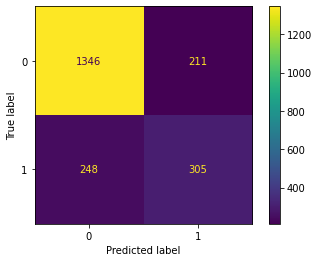

In [ ]:
evalmetrics(y_test, predicted_y)

In [ ]:
#SVM

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7985781990521327


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1557
           1       0.65      0.49      0.56       553

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110


 Accuracy = 79.86%.


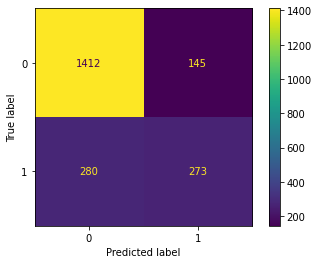

In [ ]:
evalmetrics(y_test, predict_y)

In [ ]:
#Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print("Random Forest accuracy is", metrics.accuracy_score(y_test, prediction_test))

Random Forest accuracy is 0.79478672985782


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1557
           1       0.64      0.49      0.56       553

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110


 Accuracy = 79.48%.


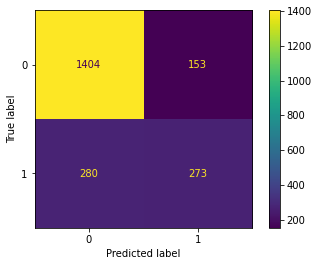

In [ ]:
evalmetrics(y_test, prediction_test)

In [ ]:
# Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.79478672985782


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1557
           1       0.62      0.55      0.58       553

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110


 Accuracy = 79.48%.


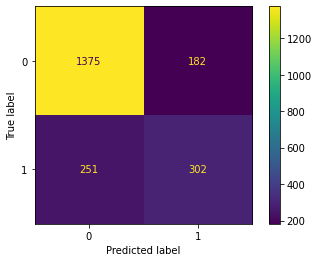

In [ ]:
evalmetrics(y_test, lr_pred)

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
predictdt_y = DT.predict(X_test)
accuracy_dt = DT.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)


Decision Tree accuracy is : 0.7421800947867299


              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1557
           1       0.51      0.53      0.52       553

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.75      0.74      0.74      2110


 Accuracy = 74.22%.


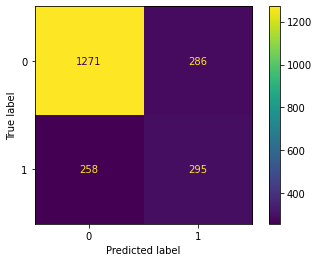

In [ ]:
evalmetrics(y_test, predictdt_y)

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy is", metrics.accuracy_score(y_test, a_preds))

AdaBoost Classifier accuracy is 0.7928909952606635


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1557
           1       0.62      0.54      0.58       553

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110


 Accuracy = 79.29%.


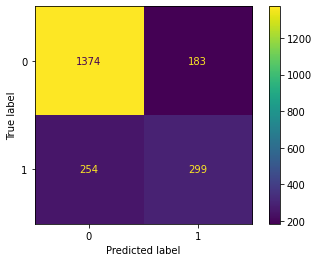

In [ ]:
evalmetrics(y_test, a_preds)

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7971563981042654


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1557
           1       0.63      0.54      0.58       553

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110


 Accuracy = 79.72%.


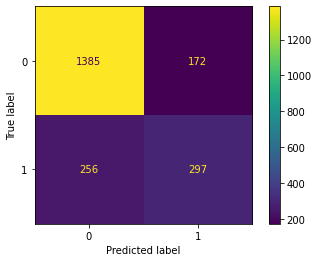

In [ ]:
evalmetrics(y_test, gb_pred)

In [ ]:
print("KNN accuracy:",accuracy_knn)
print("SVM accuracy:",accuracy_svc)
print("Random Forest accuracy:", metrics.accuracy_score(y_test, prediction_test))
print("Logistic Regression accuracy:",accuracy_lr)
print("Decision Tree accuracy:",accuracy_dt)
print("AdaBoost Classifier accuracy:", metrics.accuracy_score(y_test, a_preds))
print("Gradient Boosting Classifier accuracy:", accuracy_score(y_test, gb_pred))

KNN accuracy: 0.7824644549763033
SVM accuracy: 0.7985781990521327
Random Forest accuracy: 0.79478672985782
Logistic Regression accuracy: 0.79478672985782
Decision Tree accuracy: 0.7421800947867299
AdaBoost Classifier accuracy: 0.7928909952606635
Gradient Boosting Classifier accuracy: 0.7971563981042654


# Deep Learning Models

In [ ]:
# Deep Learning Models
X_train.shape

(4922, 19)

In [ ]:
from keras.models import Sequential
from keras import layers

In [ ]:
# define sequential model
model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [ ]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.7326
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7915
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8001
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8033
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8046
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8041
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8058
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8078
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8121
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4103 - accura

In [ ]:
# Evalute the model
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7777


[0.46653178334236145, 0.777725100517273]

In [ ]:
# Predicting the churn values
ypred = model.predict(X_test)
print(ypred)

66/66 [==============================] - 0s 1ms/step
[[0.12032929]
 [0.47138005]
 [0.49517912]
 ...
 [0.3179143 ]
 [0.26388752]
 [0.57061356]]


In [ ]:
# Unscaling the predicted values 
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 

In [ ]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':y_test, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1557
           1       0.58      0.54      0.56       553

    accuracy                           0.78      2110
   macro avg       0.71      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



Text(69.0, 0.5, 'True_number')

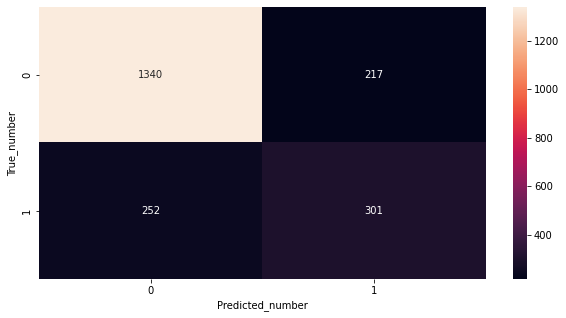

In [ ]:
import tensorflow as tf
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(y_test,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=ypred_lis)
plt.figure(figsize = (10,5))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

In [ ]:
#In conclusion, the model has a 77.7% Accuracy with a loss of 0.4665

In [ ]:
# evalute the model
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7777


[0.46653178334236145, 0.777725100517273]